In [6]:
import pandas as pd
from pathlib import Path

dfs = []
for fp in Path("data").glob("*.csv"):
    df = pd.read_csv(fp, parse_dates=["Date"])
    df["Close"] = pd.to_numeric(df["Close"], errors="coerce")
    df = df.dropna(subset=["Date","Close"])
    dfs.append(df[["Date","Ticker","Close"]])

prices = pd.concat(dfs).sort_values(["Ticker","Date"]).reset_index(drop=True)
prices.head()


,Date,Ticker,Close
0,2025-06-30,AAPL,204.937408
1,2025-07-01,AAPL,207.584412
2,2025-07-02,AAPL,212.199173
3,2025-07-03,AAPL,213.307922
4,2025-07-07,AAPL,209.711990


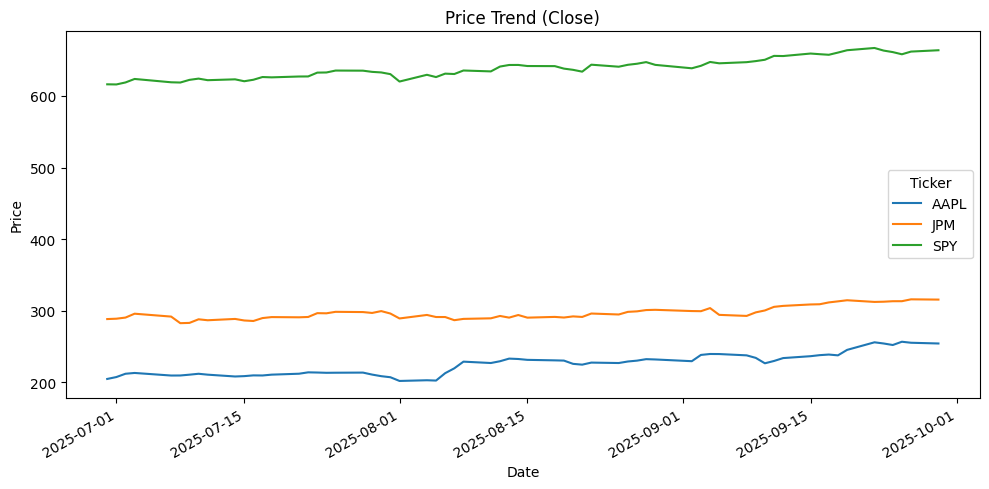

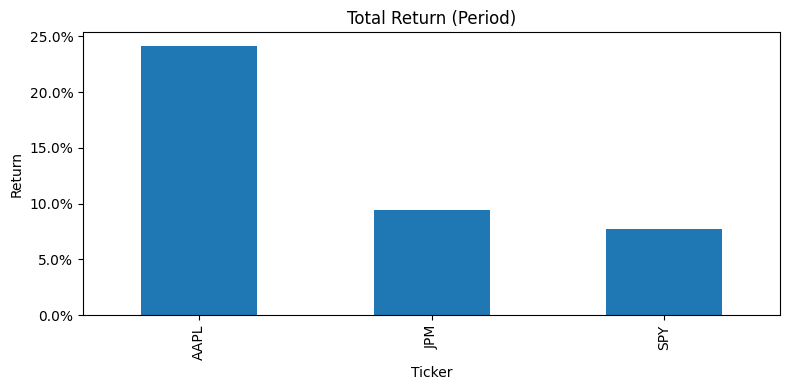

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Line chart
pivot = prices.pivot(index="Date", columns="Ticker", values="Close")
pivot.plot(figsize=(10,5))
plt.title("Price Trend (Close)")
plt.xlabel("Date"); plt.ylabel("Price")
plt.tight_layout()
plt.savefig("charts_price_trend.png", dpi=160)
plt.show()

# Bar chart of total return over full period
rets = []
for t, g in prices.groupby("Ticker"):
    g = g.sort_values("Date")
    if len(g) >= 2:
        rets.append({"Ticker": t, "Total_Return": g["Close"].iloc[-1]/g["Close"].iloc[0]-1})
summary = pd.DataFrame(rets).set_index("Ticker").sort_values("Total_Return", ascending=False)

summary.plot(kind="bar", figsize=(8,4), legend=False)
plt.title("Total Return (Period)")
plt.ylabel("Return")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.savefig("charts_total_return.png", dpi=160)
plt.show()
